In [47]:
import pandas as pd

df = pd.read_csv(r"D:\Jeeva\ds_course\sentiment_analysis\chatgpt_reviews.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [3]:
#check for total rows and columns
df.shape

(10000, 12)

In [49]:
#check for total nulls
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [51]:
#check for data types and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [53]:
#check first 5 data
df.head(5)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [55]:
#converting date column to datetime 
df['date'] = pd.to_datetime(df['date'])
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   username           10000 non-null  object        
 5   helpful_votes      10000 non-null  int64         
 6   review_length      10000 non-null  int64         
 7   platform           10000 non-null  object        
 8   language           10000 non-null  object        
 9   location           10000 non-null  object        
 10  version            10000 non-null  float64       
 11  verified_purchase  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


In [57]:
#droping username column as it is not significant
df.drop(columns=["username"],inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   helpful_votes      10000 non-null  int64         
 5   review_length      10000 non-null  int64         
 6   platform           10000 non-null  object        
 7   language           10000 non-null  object        
 8   location           10000 non-null  object        
 9   version            10000 non-null  float64       
 10  verified_purchase  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 859.5+ KB


In [19]:
#cardinality check
df.select_dtypes(include='object').nunique()


title                   10
review               10000
platform                 2
language                 5
location                 6
verified_purchase        2
dtype: int64

In [19]:
#checking unique values in categorical columns
df['title'].unique()

array(['Impressive', 'Waste of Time', 'Not Accurate',
       'Fantastic Experience', 'Very Helpful', 'Needs Improvement',
       'Superb!', 'Great Tool!', 'Too Slow', 'Buggy'], dtype=object)

In [21]:
#unique values in platform
df['platform'].unique()

array(['Mobile', 'Web'], dtype=object)

In [23]:
#unique values in language
df['language'].unique()

array(['es', 'de', 'hi', 'fr', 'en'], dtype=object)

In [25]:
#unique values in platform
df['location'].unique()

array(['Canada', 'India', 'Australia', 'Germany', 'UK', 'USA'],
      dtype=object)

In [27]:
#unique values in verified_purchase
df['verified_purchase'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
# Check data distribution for object columns
for col in ['title', 'platform', 'language', 'location', 'verified_purchase']:
    print(df[col].value_counts())
    print()


title
Buggy                   1037
Very Helpful            1019
Waste of Time           1018
Too Slow                1016
Superb!                 1012
Great Tool!             1001
Needs Improvement        994
Fantastic Experience     984
Impressive               970
Not Accurate             949
Name: count, dtype: int64

platform
Mobile    5011
Web       4989
Name: count, dtype: int64

language
en    2016
fr    2013
de    2001
hi    1991
es    1979
Name: count, dtype: int64

location
Canada       1711
UK           1686
Germany      1664
India        1659
USA          1654
Australia    1626
Name: count, dtype: int64

verified_purchase
No     5116
Yes    4884
Name: count, dtype: int64



In [61]:
def map_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['rating'].apply(map_sentiment)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   helpful_votes      10000 non-null  int64         
 5   review_length      10000 non-null  int64         
 6   platform           10000 non-null  object        
 7   language           10000 non-null  object        
 8   location           10000 non-null  object        
 9   version            10000 non-null  float64       
 10  verified_purchase  10000 non-null  object        
 11  sentiment          10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


In [60]:
df['review_length'] = df['review'].str.len()
df['review_length'].describe()

count    10000.000000
mean       147.034000
std         34.911708
min         30.000000
25%        122.000000
50%        151.000000
75%        176.000000
max        199.000000
Name: review_length, dtype: float64

In [62]:
#value count for rating
df['rating'].value_counts()

rating
1    2062
5    2013
2    2007
4    1975
3    1943
Name: count, dtype: int64

In [64]:
#value count for version
df['version'].value_counts()

version
4.1    2522
3.0    2496
4.0    2491
3.5    2491
Name: count, dtype: int64

In [66]:
#extracting date
edf= df.copy()
edf['month'] = edf['date'].dt.month
edf['day'] = edf['date'].dt.day
edf['weekday_name'] = edf['date'].dt.day_name() 
edf['is_weekend'] = edf['weekday_name'].isin(["Sunday", "Saturday"]) 


In [68]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   helpful_votes      10000 non-null  int64         
 5   review_length      10000 non-null  int64         
 6   platform           10000 non-null  object        
 7   language           10000 non-null  object        
 8   location           10000 non-null  object        
 9   version            10000 non-null  float64       
 10  verified_purchase  10000 non-null  object        
 11  sentiment          10000 non-null  object        
 12  month              10000 non-null  int32         
 13  day                10000 non-null  int32         
 14  weekday

In [70]:
edf.tail(5)

,date,title,review,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,month,day,weekday_name,is_weekend
9995,2024-06-13,Very Helpful,Little section hit her through. Likely job ind...,5,30,83,Web,de,Australia,3.0,No,positive,6,13,Thursday,False
9996,2024-07-16,Buggy,Throw with record relationship help reduce vot...,3,68,189,Mobile,es,Germany,3.5,Yes,neutral,7,16,Tuesday,False
9997,2024-07-22,Not Accurate,Within nothing study charge all. Toward milita...,3,10,185,Web,de,India,3.0,Yes,neutral,7,22,Monday,False
9998,2024-05-24,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,48,163,Mobile,fr,UK,3.0,Yes,neutral,5,24,Friday,False
9999,2025-02-17,Fantastic Experience,Resource plant behind vote its try laugh. Othe...,2,61,81,Web,en,Germany,3.5,Yes,negative,2,17,Monday,False


<Axes: xlabel='weekday_name', ylabel='count'>

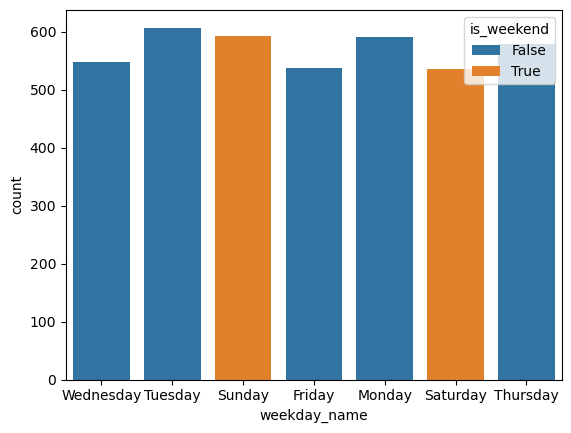

In [72]:
edf[edf['sentiment'] == 'positive'].groupby(['is_weekend'])['sentiment'].count()
import seaborn as sns
sns.countplot(data=edf[edf['sentiment'] == 'positive'], x='weekday_name', hue='is_weekend')


In [74]:
pos_counts = edf[edf['sentiment'] == 'positive'].groupby('is_weekend').size()
neg_counts = edf[edf['sentiment'] == 'negative'].groupby('is_weekend').size()


<Axes: title={'center': 'Positive Review Trend Over Time'}, xlabel='month'>

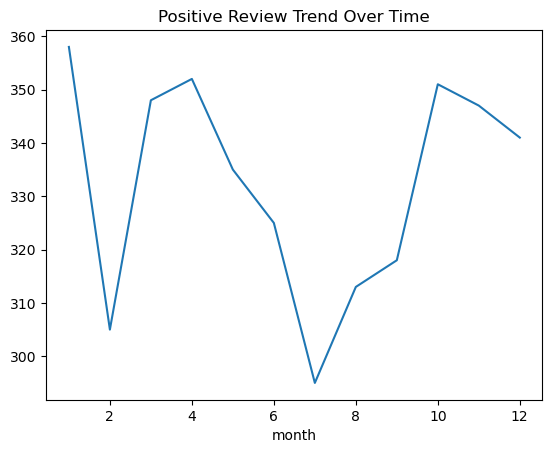

In [51]:
pos_daily = edf[edf['sentiment'] == 'positive'].groupby('month').size()
pos_daily.plot(title='Positive Review Trend Over Time')


<Axes: title={'center': 'negative Review Trend Over Time'}, xlabel='month'>

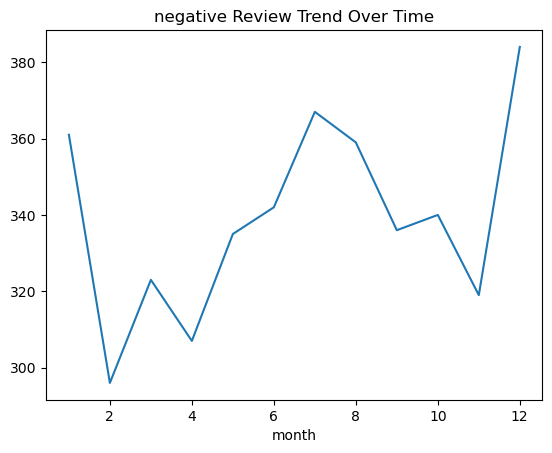

In [55]:
neg_daily = edf[edf['sentiment'] == 'negative'].groupby('month').size()
neg_daily.plot(title='negative Review Trend Over Time')

<Axes: title={'center': 'Monthly Sentiment Trend'}, xlabel='month'>

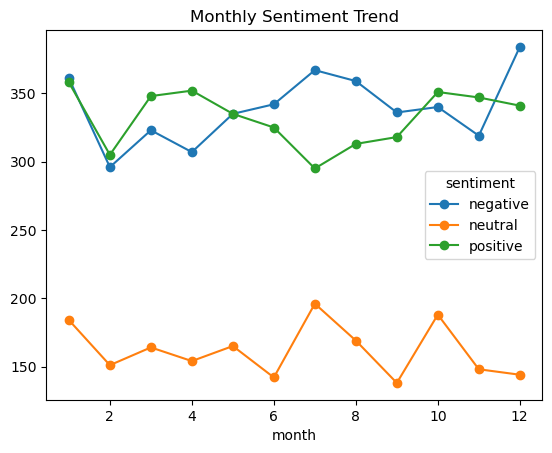

In [57]:
monthly = edf.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
monthly.plot(kind='line', marker='o', title='Monthly Sentiment Trend')


In [69]:
edf.describe()

,date,rating,helpful_votes,review_length,version,month,day,year
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-09-25 04:15:36,2.987000,50.347800,147.034000,3.651070,6.522700,15.731400,2024.233600
min,2024-03-26 00:00:00,1.000000,0.000000,30.000000,3.000000,1.000000,1.000000,2024.000000
25%,2024-06-26 00:00:00,2.000000,25.000000,122.000000,3.500000,4.000000,8.000000,2024.000000
50%,2024-09-27 00:00:00,3.000000,50.000000,151.000000,4.000000,7.000000,16.000000,2024.000000
75%,2024-12-26 00:00:00,4.000000,75.000000,176.000000,4.100000,10.000000,23.000000,2024.000000
max,2025-03-26 00:00:00,5.000000,100.000000,199.000000,4.100000,12.000000,31.000000,2025.000000
std,NaN,1.424161,28.914613,34.911708,0.438935,3.471842,8.804954,0.423142


In [67]:
edf['year'] = edf['date'].dt.year

In [93]:
edf.describe()

,date,rating,helpful_votes,review_length,version,month,day,year
count,9992,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000
mean,2024-09-25 02:31:53.851080704,2.987190,50.340773,147.124700,3.651121,6.524019,15.733887,2024.233287
min,2024-03-26 00:00:00,1.000000,0.000000,41.000000,3.000000,1.000000,1.000000,2024.000000
25%,2024-06-26 00:00:00,2.000000,25.000000,122.000000,3.500000,4.000000,8.000000,2024.000000
50%,2024-09-27 00:00:00,3.000000,50.000000,151.500000,4.000000,7.000000,16.000000,2024.000000
75%,2024-12-26 00:00:00,4.000000,75.000000,176.000000,4.100000,10.000000,23.000000,2024.000000
max,2025-03-26 00:00:00,5.000000,100.000000,199.000000,4.100000,12.000000,31.000000,2025.000000
std,NaN,1.424311,28.918771,34.778008,0.438947,3.471234,8.803686,0.422944


In [95]:
df.describe(include='object')

,title,review,platform,language,location,verified_purchase,sentiment
count,9992,9992,9992,9992,9992,9992,9992
unique,10,9992,2,5,6,2,3
top,Buggy,Mother former community upon vote fact. Sure s...,Mobile,en,Canada,No,negative
freq,1036,1,5011,2016,1710,5112,4065


In [99]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               9992 non-null   datetime64[ns]
 1   title              9992 non-null   object        
 2   review             9992 non-null   object        
 3   rating             9992 non-null   int64         
 4   helpful_votes      9992 non-null   int64         
 5   review_length      9992 non-null   int64         
 6   platform           9992 non-null   object        
 7   language           9992 non-null   object        
 8   location           9992 non-null   object        
 9   version            9992 non-null   float64       
 10  verified_purchase  9992 non-null   object        
 11  sentiment          9992 non-null   object        
 12  month              9992 non-null   int32         
 13  day                9992 non-null   int32         
 14  weekday_

In [101]:
#univariate analysis of rating
edf['rating'].describe()

count    9992.000000
mean        2.987190
std         1.424311
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

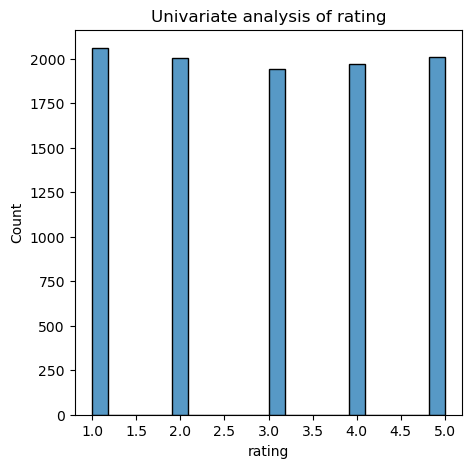

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.histplot(data=df,x='rating')
plt.title("Univariate analysis of rating")
plt.show()

In [123]:
edf.groupby('platform')['rating'].count()

platform
Mobile    5011
Web       4981
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

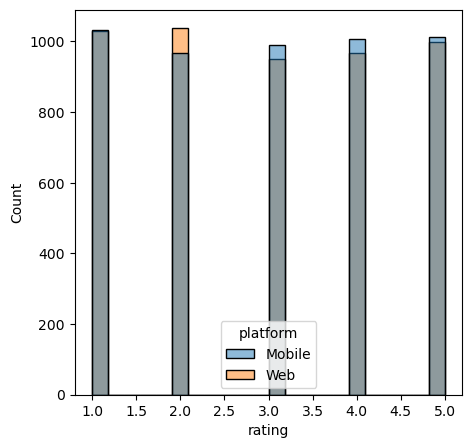

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.histplot(data=edf,x='rating',hue='platform')

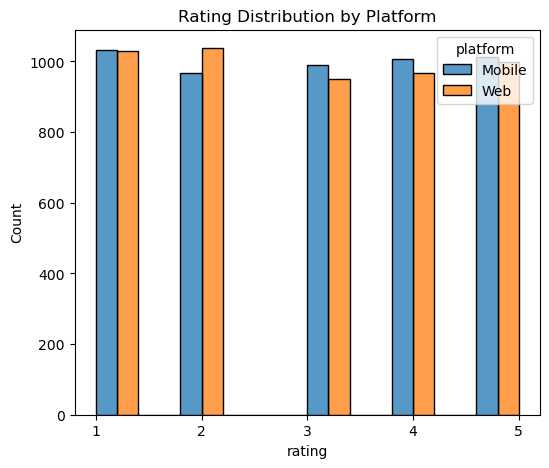

In [151]:
#rating analysis by platform

plt.figure(figsize=(6,5))
sns.histplot(data=edf, x='rating', hue='platform' , multiple = 'dodge')
plt.xticks([1, 2, 3, 4, 5])
plt.title('Rating Distribution by Platform')
plt.show()


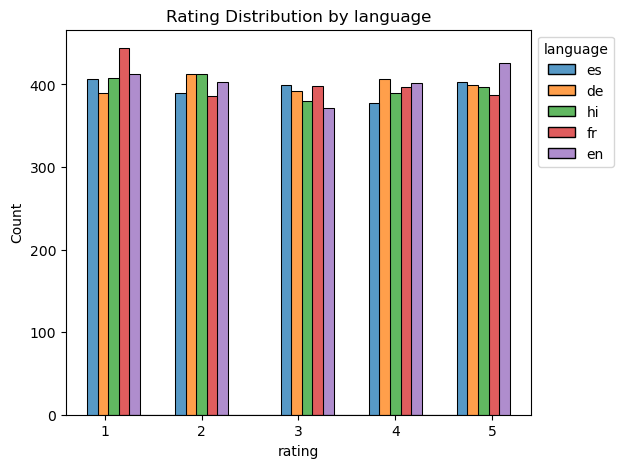

In [195]:
#rating analysis by platform

plt.figure(figsize=(6,5))
ax = sns.histplot(data=edf, x='rating', hue='language' , multiple = 'dodge',shrink=3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks([1, 2, 3, 4, 5])
plt.title('Rating Distribution by language')
plt.show()


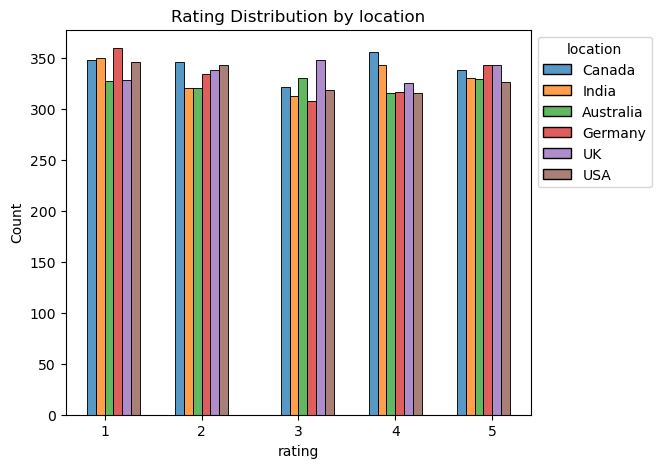

In [197]:
#rating analysis by location

plt.figure(figsize=(6,5))
ax = sns.histplot(data=edf, x='rating', hue='location' , multiple = 'dodge',shrink=3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks([1, 2, 3, 4, 5])
plt.title('Rating Distribution by location')
plt.show()


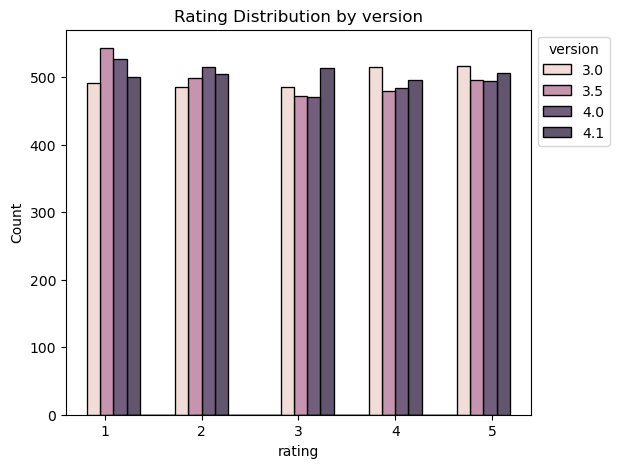

In [199]:
#rating analysis by version

plt.figure(figsize=(6,5))
ax = sns.histplot(data=edf, x='rating', hue='version' , multiple = 'dodge',shrink=3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks([1, 2, 3, 4, 5])
plt.title('Rating Distribution by version')
plt.show()


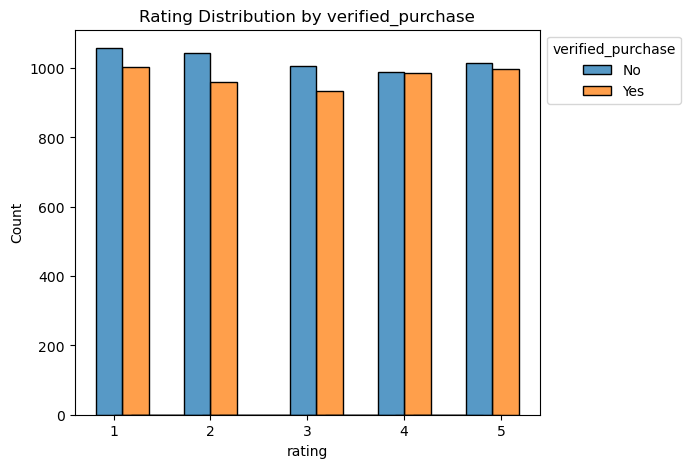

In [205]:
#rating analysis by purchase

plt.figure(figsize=(6,5))
ax = sns.histplot(data=edf, x='rating', hue='verified_purchase' , multiple = 'dodge',shrink=3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks([1, 2, 3, 4, 5])
plt.title('Rating Distribution by verified_purchase')
plt.show()


In [257]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               9992 non-null   datetime64[ns]
 1   title              9992 non-null   object        
 2   review             9992 non-null   object        
 3   rating             9992 non-null   int64         
 4   helpful_votes      9992 non-null   int64         
 5   review_length      9992 non-null   int64         
 6   platform           9992 non-null   object        
 7   language           9992 non-null   object        
 8   location           9992 non-null   object        
 9   version            9992 non-null   float64       
 10  verified_purchase  9992 non-null   object        
 11  sentiment          9992 non-null   object        
 12  month              9992 non-null   int32         
 13  day                9992 non-null   int32         
 14  weekday_

In [259]:
edf['title'].unique()

array(['Impressive', 'Waste of Time', 'Not Accurate',
       'Fantastic Experience', 'Very Helpful', 'Needs Improvement',
       'Superb!', 'Great Tool!', 'Too Slow', 'Buggy'], dtype=object)

In [78]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [86]:
edf['rating'].value_counts().sort_index()

rating
1    2062
2    2007
3    1943
4    1975
5    2013
Name: count, dtype: int64

In [88]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JEEVA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   helpful_votes      10000 non-null  int64         
 5   review_length      10000 non-null  int64         
 6   platform           10000 non-null  object        
 7   language           10000 non-null  object        
 8   location           10000 non-null  object        
 9   version            10000 non-null  float64       
 10  verified_purchase  10000 non-null  object        
 11  sentiment          10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack


# Input features
text = df['review']
X_categorical = df[['platform', 'language', 'location', 'verified_purchase', 'title']]
y = df['sentiment']

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


from sklearn.model_selection import train_test_split

text_train, text_test, cat_train, cat_test, y_train, y_test = train_test_split(
    text, X_categorical, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_text = tfidf.fit_transform(text_train)
X_test_text = tfidf.transform(text_test)


ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)

X_train_cat = ohe.fit_transform(cat_train)
X_test_cat = ohe.transform(cat_test)


from scipy.sparse import hstack

X_train_combined = hstack([X_train_text, X_train_cat])
X_test_combined = hstack([X_test_text, X_test_cat])


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_combined, y_train)
y_pred = model.predict(X_test_combined)


from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [69]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   helpful_votes      10000 non-null  int64         
 5   review_length      10000 non-null  int64         
 6   platform           10000 non-null  object        
 7   language           10000 non-null  object        
 8   location           10000 non-null  object        
 9   version            10000 non-null  float64       
 10  verified_purchase  10000 non-null  object        
 11  sentiment          10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


,date,title,review,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,68,78,Mobile,es,Canada,3.0,No,negative
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,71,193,Web,de,India,4.1,Yes,positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,66,184,Web,hi,India,4.1,Yes,positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,5,193,Web,fr,Canada,4.0,Yes,negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,71,131,Web,hi,Australia,4.1,No,neutral


In [71]:
df.to_csv(r"D:\Jeeva\ds_course\sentiment_analysis\chatgpt_reviews_cleaned.csv",index=False)

In [1]:
import pandas as pd

df_new = pd.read_csv(r"D:\Jeeva\ds_course\sentiment_analysis\chatgpt_reviews_cleaned.csv")
df_new.head()

,date,title,review,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,68,78,Mobile,es,Canada,3.0,No,negative
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,71,193,Web,de,India,4.1,Yes,positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,66,184,Web,hi,India,4.1,Yes,positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,5,193,Web,fr,Canada,4.0,Yes,negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,71,131,Web,hi,Australia,4.1,No,neutral


In [3]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   helpful_votes      10000 non-null  int64  
 5   review_length      10000 non-null  int64  
 6   platform           10000 non-null  object 
 7   language           10000 non-null  object 
 8   location           10000 non-null  object 
 9   version            10000 non-null  float64
 10  verified_purchase  10000 non-null  object 
 11  sentiment          10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [5]:
df_new['location'].unique()

array(['Canada', 'India', 'Australia', 'Germany', 'UK', 'USA'],
      dtype=object)

In [7]:
df_new['language'].unique()

array(['es', 'de', 'hi', 'fr', 'en'], dtype=object)

In [9]:
df_new['version'].unique()

array([3. , 4.1, 4. , 3.5])

In [11]:
df_new['rating'].unique()

array([2, 5, 4, 1, 3], dtype=int64)

In [13]:
df_new['verified_purchase'].unique()

array(['No', 'Yes'], dtype=object)